# MATH&ML-6. Математический анализ в контексте задачи оптимизации. Часть III

## 1. Введение

✍ Мы подошли к заключительной части раздела, посвящённого математическому анализу и оптимизации. В предыдущих модулях мы уже познакомились с функциями и их исследованием, научились находить минимальные и максимальные значения для функций, а также применять эти значения для решения реальных задач. В данном модуле мы продолжим углубляться в методы оптимизации, сравним их и обсудим, для каких случаев какие алгоритмы подходят лучше всего.

За два прошлых модуля мы узнали достаточно много важных понятий и инструментов — давайте **повторим их** ↓

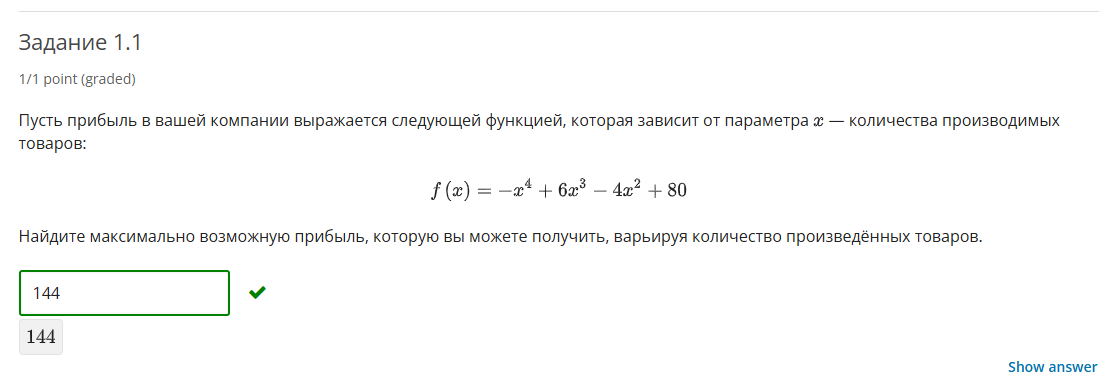

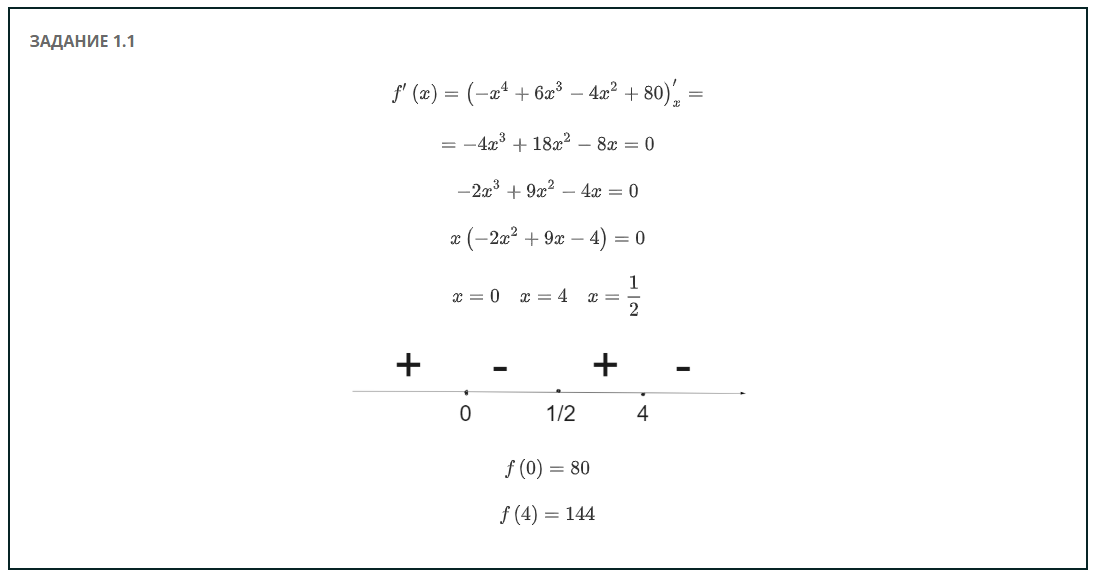

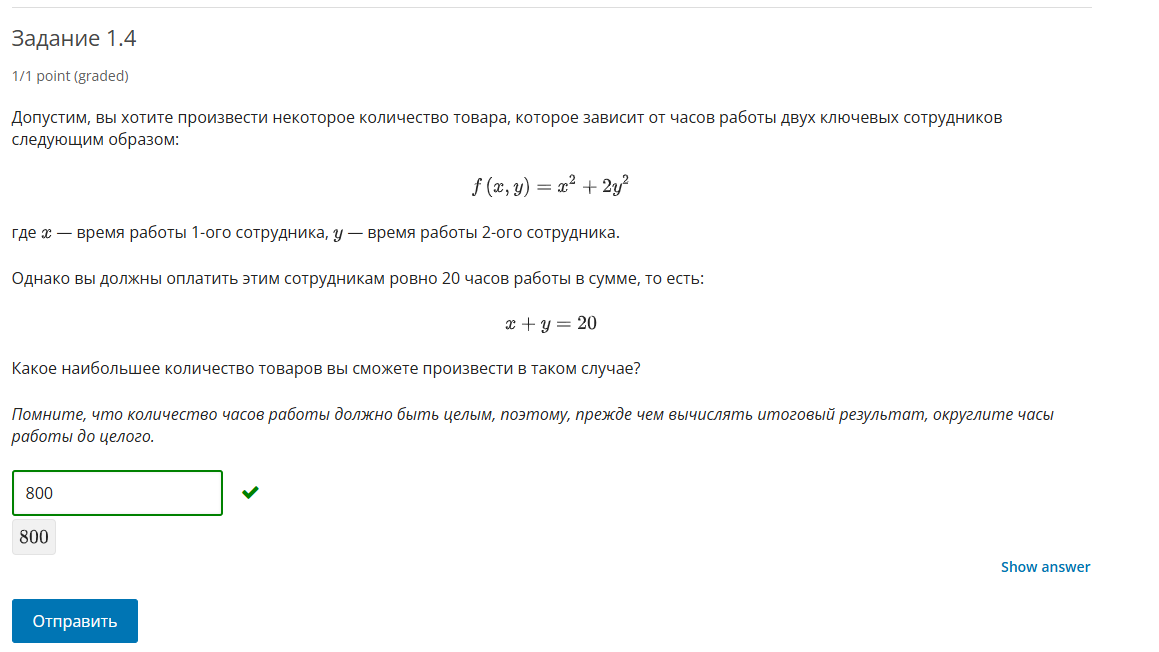

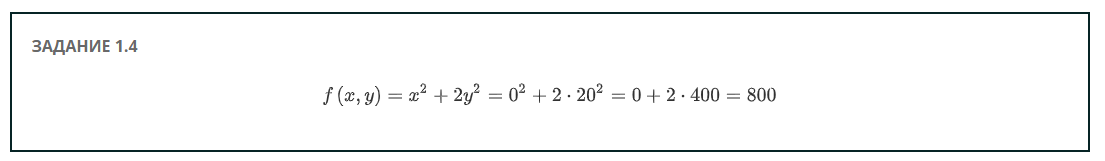

Отлично, мы повторили пройденное — теперь можно приступать к дальнейшему изучению темы.

**Этот модуль мы посвятим изучению новых методов оптимизации:**

- рассмотрим, какие вариации существуют у уже известного вам алгоритма градиентного спуска, и узнаем, в чём суть **обратного распространения ошибки**;
- познакомимся с **методом Ньютона и квазиньютоновскими методами BFGS и L-BFGS**;
- разберём область применения задач линейного программирования и попрактикуемся в их решении;
- узнаем, что такое **метод отжига и метод координатного спуска**.

Из предыдущего модуля вы помните, что в каких-то методах оптимизации мы использовали лишь значение функции, где-то — считали градиент, а где-то — находили матрицы производных. Эти особенности дают возможность поделить все алгоритмы на **три группы**:

- методы нулевого порядка (их работа основана на оценке значений самой целевой функции в разных точках);
- методы первого порядка (при работе они используют первые производные в дополнение к информации о значении функции);
- методы второго порядка (для них необходимо оценивать и значение функции, и значение градиента, и гессиан (матрицу Гессе).

Примечание. Иногда в литературе можно встретить термины «оракул первого порядка» или «оракул нулевого порядка». Так обозначают компоненты алгоритма, которые находят информацию на каждом шаге для метода соответствующего порядка.

В данном модуле мы будем рассматривать методы разных порядков и практически в каждом юните будем практиковаться в их применении. В конце мы обобщим полученные знания и сравним, какие методы и в каких случаях показывают наилучшие результаты.

→ Важно отметить, что некоторые алгоритмы оптимизации мы пока не сможем использовать по прямому назначению: мы опробуем их на известных вам моделях линейной или логистической регрессии или на функциях одной или нескольких переменных, но основная сфера их применения — это искусственные нейронные сети. Тем не менее, понимание всего пула алгоритмов поможет вам в будущем без проблем подбирать необходимый метод вне зависимости от того, задачу какой сложности вы решаете: минимизируете простейшую функцию или обучаете нейронную сеть со сложной архитектурой.

# 2. Градиентный спуск: применение и модификации

✍ В предыдущем модуле мы познакомились с алгоритмом градиентного спуска, а также с его очень популярной вариацией — градиентным спуском с momentum. Но на самом деле у градиентного спуска очень много модификаций, и, поскольку это действительно самый известный алгоритм, он является основой множества методов оптимизации. В этом юните мы рассмотрим и сравним три вариации градиентного спуска, которые используются наиболее часто.

Чтобы лучше понимать, какую роль играют методы оптимизации в DS и почему их так много, важно понимать основные **принципы работы нейронных сетей**. Также в современных статьях и обзорах разных методов оптимизации они практически всегда рассматриваются в контексте применения в нейронных сетях.

Процесс обучения человеческого мозга очень сложен, и наука пока не может дать достаточно подробный ответ на вопрос о том, как мы получаем и усваиваем знания, как принимаем решения. Однако той информации, которую уже удалось получить, оказалось достаточно, чтобы по аналогии создать модели искусственных нейронных сетей.

Люди учатся через пробы и ошибки, через процесс **синаптической пластичности**. Точно так же, как связи в мозге укрепляются и формируются по мере того, как мы переживаем новые события, мы обучаем искусственные нейронные сети, вычисляя ошибки нейросетевых предсказаний и усиливая или ослабляя внутренние связи между нейронами на основе этих ошибок.

Для лучшего понимания удобно воспринимать нейронную сеть как функцию, которая принимает входные данные для получения итогового прогноза. Переменными этой функции являются параметры, или веса, нейрона.

Следовательно, ключевым моментом для решения задачи, которую мы ставим для нейронной сети, будет **корректировка значений весов** таким образом, чтобы они аппроксимировали или наилучшим образом представляли набор данных.

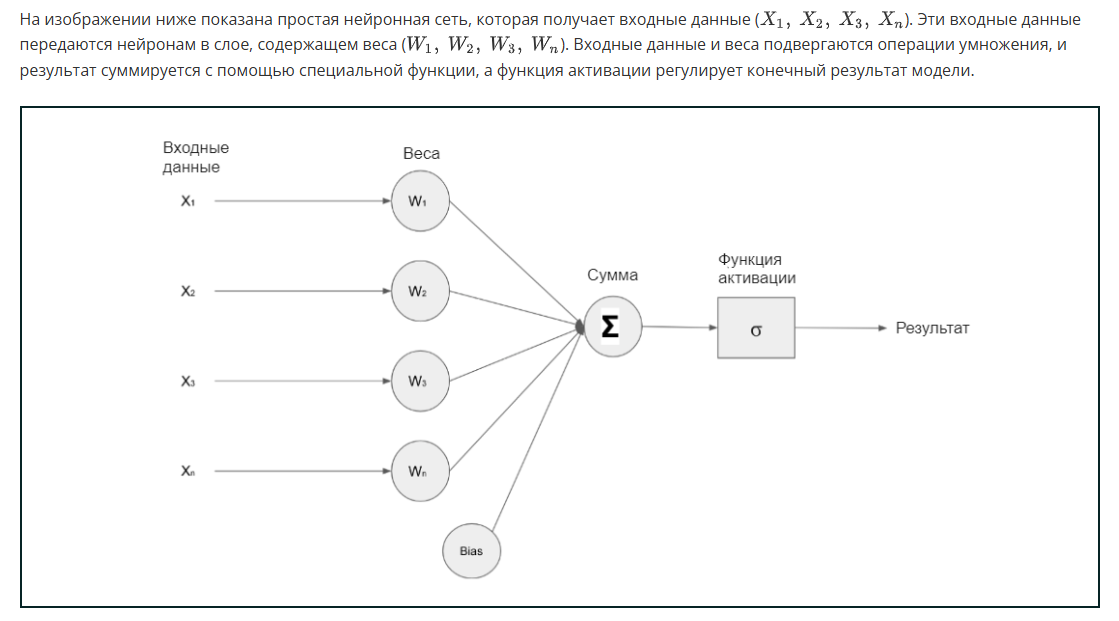

Для того чтобы оценить, насколько эффективно работает наша нейронная сеть, необходим показатель оценки разницы между предсказанием нейронной сети и фактическим значением целевой функции, позволяющий корректировать параметры сети так, чтобы разница между прогнозом и реальностью была как можно меньше. В Data Science эту разницу часто называют **функцией стоимости**.

Ниже представлена модель работы простейшей нейронной сети:

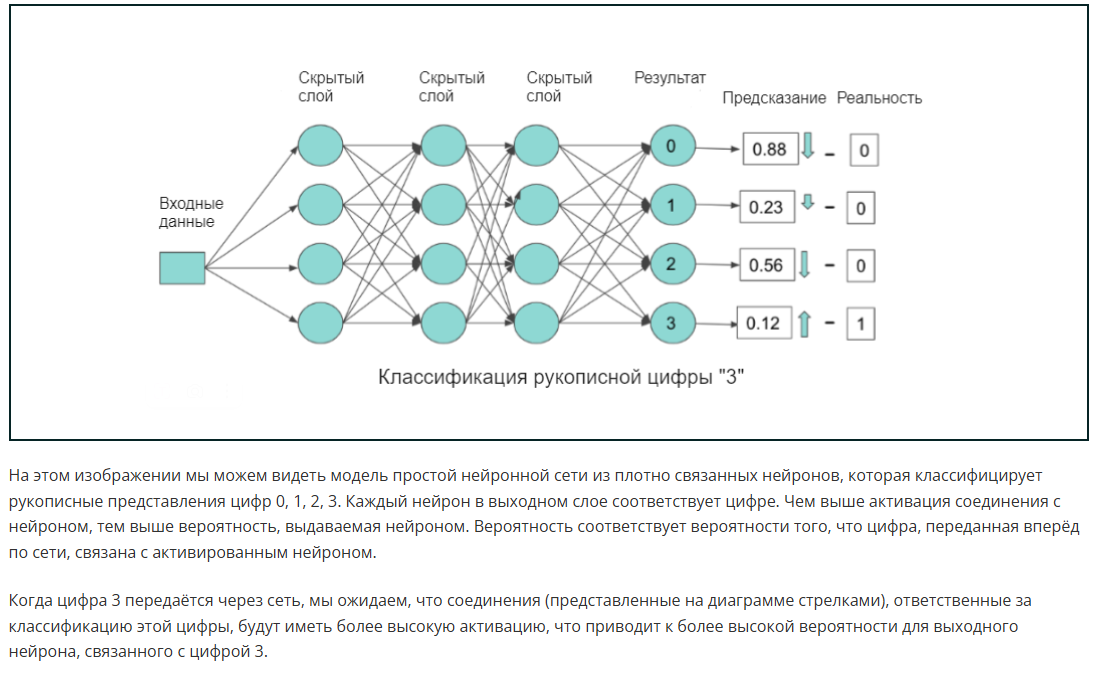

Если объяснить происходящее более простыми словами, то механизм работы примерно такой:

1. На первом слое мы выделяем из цифры какие-то первичные признаки (округлости, палочки).
2. На втором слое мы выделяем уже какие-то паттерны (фрагменты цифры).
3. На третьем слое паттерны складываются в целую цифру и мы можем предсказать результат.

Каждый раз элементы, более похожие на элементы цифры 3, дают более высокую активацию.

За активацию нейрона отвечает несколько компонентов, и мы должны менять их в процессе обучения нашей нейронной сети, повышая качество её предсказания.

Допустим, мы используем уже хорошо известную вам среднеквадратичную ошибку как меру для оценки качества модели. В этом случае мы каждый раз вычисляем её, получаем результат и отправляем его обратно для коррекции весов в сети. Здесь как раз и появляется понятие **обратного распространения ошибки**.

**Обратное распространение (backpropagation)** — это механизм, с помощью которого компоненты, влияющие на итоговый результат, итеративно корректируются для уменьшения функции стоимости.

Важнейшим математическим процессом, связанным с обратным распространением, является вычисление производных. Операции обратного распространения вычисляют частную производную функции стоимости по отношению к весам и активациям предыдущего слоя, чтобы определить, какие значения влияют на градиент функции стоимости.

→ В процессе минимизации  функции ошибки мы постоянно вычисляем значение градиентов и таким образом приходим к локальному минимуму. На каждом этапе обучения нейронной сети её веса пересчитываются с помощью найденного градиента, причём скорость обучения (или, мы уже называли её ранее, темп обучения или шаг градиентного спуска) определяет коэффициент, с которым вносятся изменения в значения весов. Это повторяется на каждом шаге обучения нейронной сети. Нашей целью является постоянное приближение к локальному минимуму.

Принцип обратного распространения ошибки заключается в том, что сначала мы устанавливаем какие-то случайные веса (параметры) для модели, находим итоговую ошибку и движемся по сети обратно, корректируя веса (для этого вычисляем частные производные, т. е. градиент).

Данный процесс выглядит следующим образом:

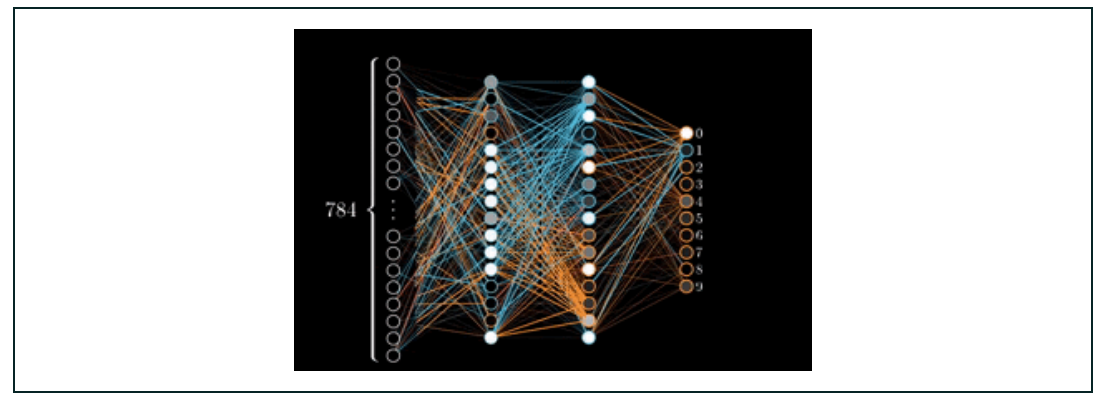

Распространение ошибок и использование частных производных для корректировки весов происходит до тех пор, пока не будут скорректированы все параметры в сети вплоть до первого слоя.

Если вам хочется больше узнать про механизм обратного распространения ошибки, рекомендуем обратиться к этой статье. https://brilliant.org/wiki/backpropagation/

Как вы можете видеть, даже в самом простом примере нейронной сети много переменных и действий, которые с ними происходят. Из-за этого ландшафт функции потерь для нейронных сетей становится очень сложным. К примеру, ландшафт для нейронной сети с 56 слоями может выглядеть так:

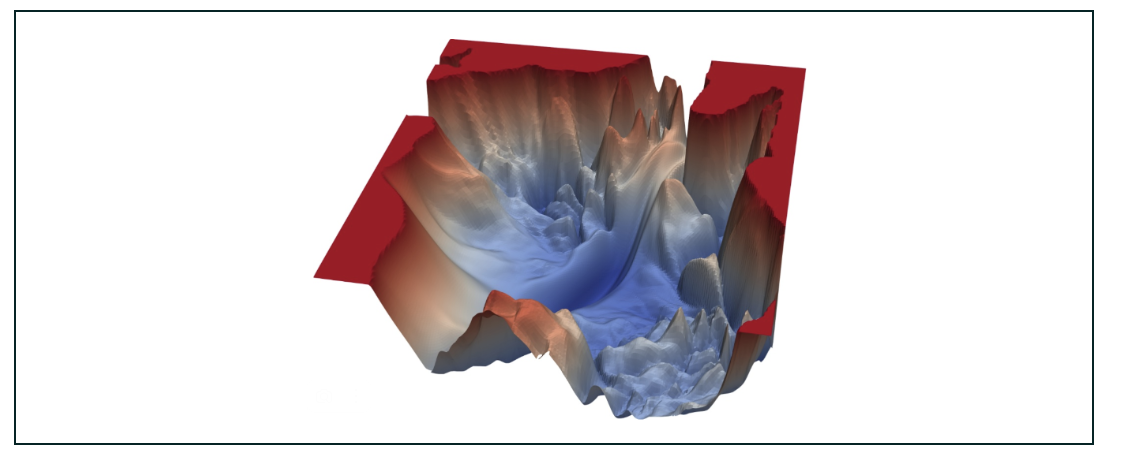

В предыдущем модуле мы без проблем решили задачу с помощью классического градиентного спуска, и результат совпал с итогом, полученным с помощью реализации алгоритма в стандартной библиотеке Python. Но функция потерь там была совершенно другой. Когда дело доходит до искусственных нейронных сетей, алгоритмы оптимизации сталкиваются с множеством проблем.

**Основные проблемы при реализации градиентного спуска:**

- Классический градиентный спуск склонен застревать в точках локального минимума и даже в седловых точках, словом — везде, где градиент равен нулю. Это мешает найти глобальный минимум.
- Обычно у оптимизируемой функции очень сложный ландшафт: где-то она совсем пологая, где-то более крутой обрыв. В таких ситуациях градиентный спуск показывает не лучшие результаты. Так происходит потому, что в алгоритме градиентного спуска фиксированный шаг, а нам в идеале хотелось бы его изменять в зависимости от формы функции прямо в процессе обучения.
- Много проблем возникает из-за темпа обучения: при низком алгоритм сходится невероятно медленно, при быстром — «пролетает» мимо минимумов.
- При обучении градиентного спуска координаты в некоторых измерениях могут редко изменяться, что приводит к плохой обобщающей способности алгоритма. Можно попытаться придать каждому признаку бόльшую важность, но в таком случае есть серьёзный риск переобучить модель.

Тем не менее, нельзя отрицать, что градиентный спуск — невероятно эффективный и популярный алгоритм. Допустим, он прекрасно подходит для минимизации среднеквадратичной ошибки в случае решения задачи регрессии. Однако в силу его несовершенств, которые очень явно проявляются в сложных моделях (например, в нейронных сетях), были созданы некоторые его модификации, которые позволяют решать задачи с большей результативностью.

Обычно выделяют **три основных вариации градиентного спуск**:

- Batch Gradient Descent;
- Stochastic Gradient Descent;
- Mini-batch Gradient Descent.

Далее мы рассмотрим все эти модификации и обсудим их различия. Важно понимать, что, несмотря на то что про их применение часто говорят именно в контексте нейронных сетей, они прекрасно подходят и для использования с обычными методами машинного обучения. К примеру, для стандартной линейной регрессии также подходит и обычный градиентный спуск.

### Batch Gradient Descent

Первая вариация — это **Batch Gradient Descent**. По-русски её называют **пакетным градиентным спуском**, или **ванильным градиентным спуском** (хотя англоязычную вариацию Vanilla Gradient Descent чаще не переводят). По сути, это и есть классический градиентный спуск, который мы с вами рассматривали в предыдущем модуле.

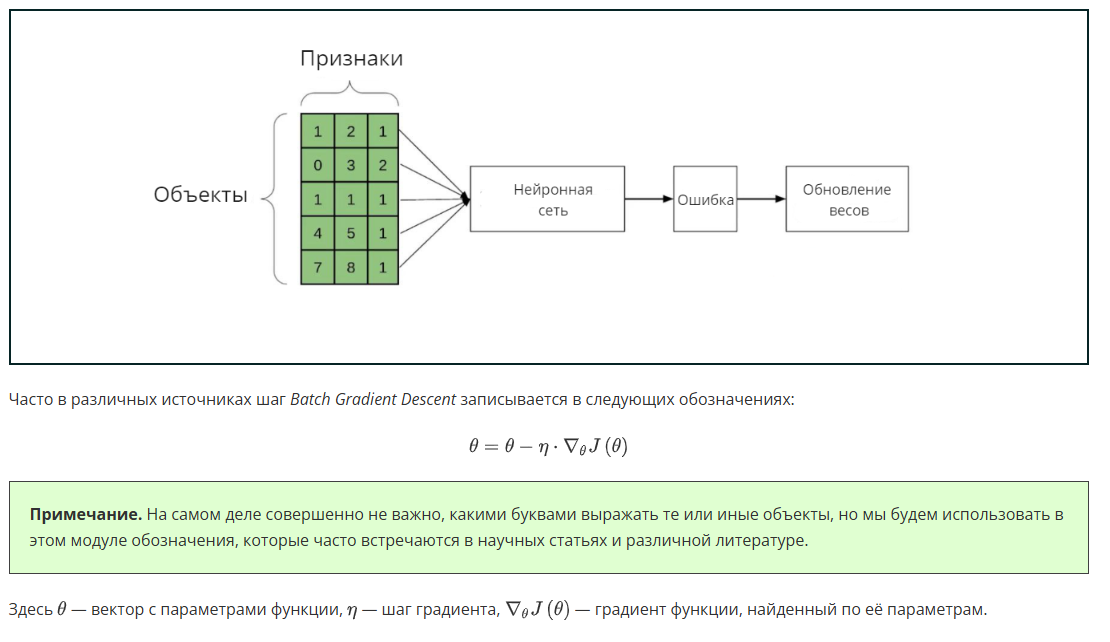

Таким образом, на каждом шаге градиентный спуск находит направление наискорейшего убывания функции и движется чётко по нему. Поэтому для несложных функций он достаточно быстро сходится. Его обучение можно изобразить следующим образом:

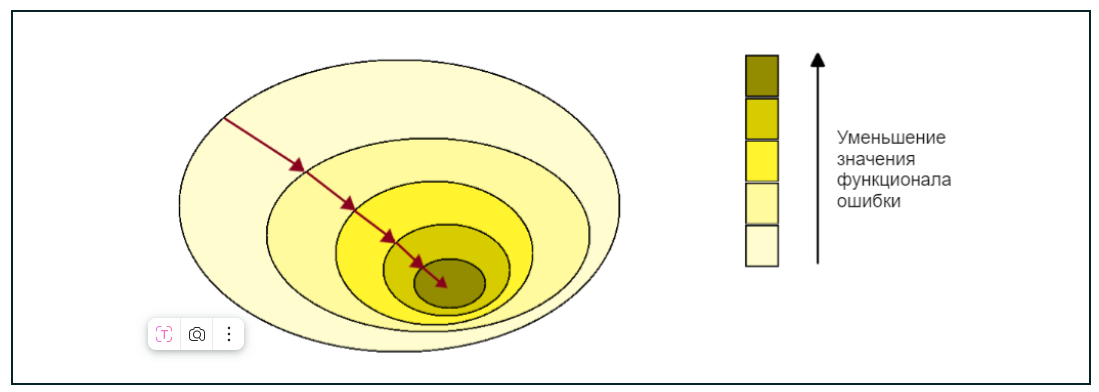

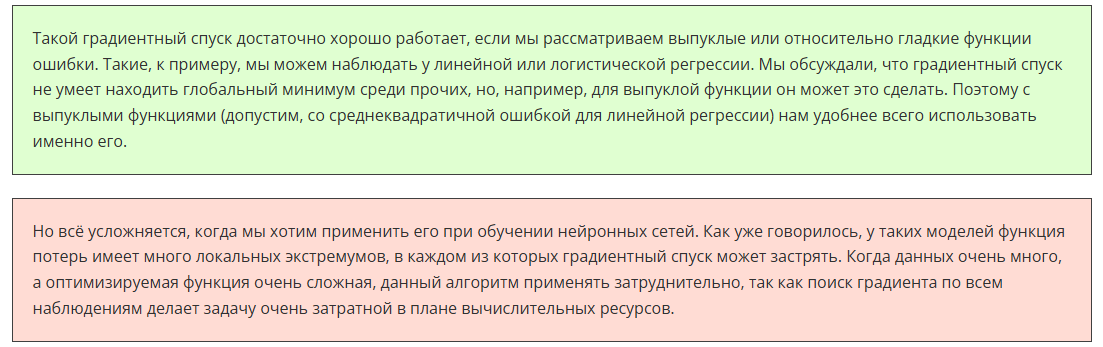

### Stochastic Gradient Descent

Представим, что мы реализуем градиентный спуск для набора данных объёмом 10 000 наблюдений и у нас десять переменных. Среднеквадратичную ошибку считаем по всем точкам, то есть для 10 000 наблюдений. Производную необходимо посчитать по каждому параметру, поэтому фактически за каждую итерацию мы будем выполнять не менее 100 000 вычислений. И если, допустим, у нас 1000 итераций, то нам нужно 100000*1000=100000000 вычислений. Это довольно много, поэтому градиентный спуск на сложных моделях и при использовании больших наборов данных работает крайне долго.

Чтобы преодолеть эту проблему, придумали стохастический градиентный спуск. Слово «стохастический» можно воспринимать как синоним слова «случайный». Где же при использовании градиентного спуска может возникнуть случайность? При выборе данных. При реализации стохастического спуска вычисляются градиенты не для всей выборки, а только для случайно выбранной единственной точки.

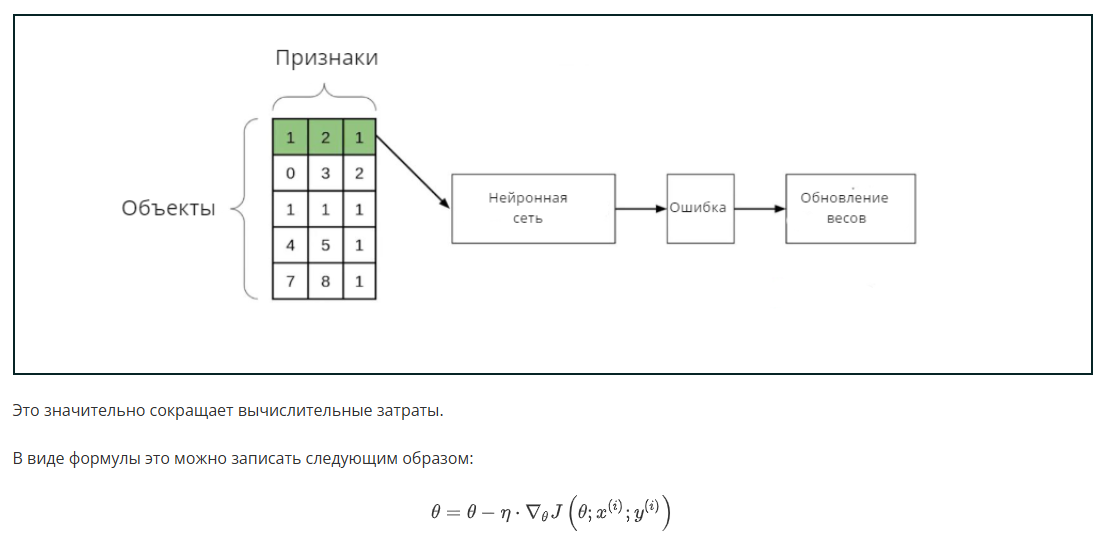

На визуальном представлении ниже можно увидеть, что стохастический спуск создаёт много колебаний при сходимости. Это происходит как раз за счёт того, что берётся не вся выборка, а только один объект, и между объектами может быть достаточно большая разница. Чем меньше выборка, тем меньше стабильности при реализации.

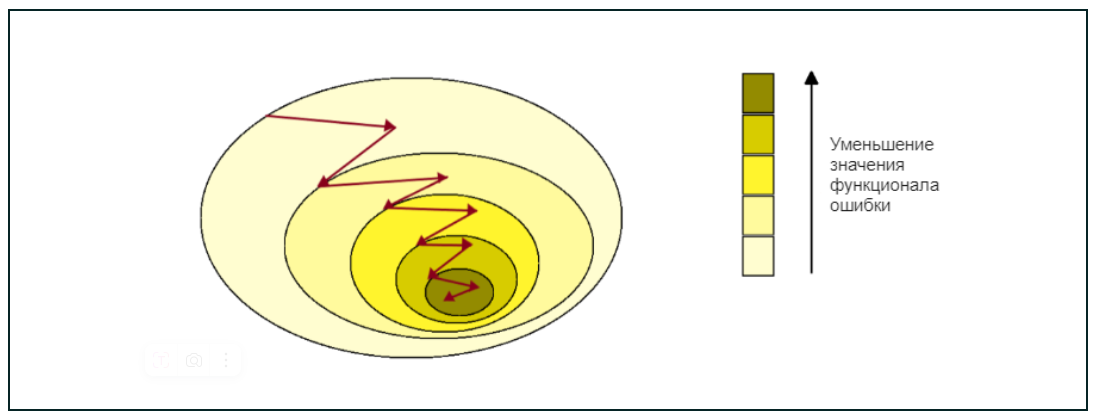

Стохастический градиентный спуск очень часто используется в нейронных сетях и сокращает время машинных вычислений, одновременно повышая сложность и производительность крупномасштабных задач.

### Mini-batch Gradient Descent

Третья вариация градиентного спуска — **Mini-batch Gradient Descent**. Также можно называть его **мини-пакетным градиентным спуском**. По сути, эта модификация сочетает в себе лучшее от классической реализации и стохастического варианта. На данный момент это наиболее популярная реализация градиентного спуска, которая используется в глубоком обучении (т. е. в обучении нейронных сетей).

В ходе обучения модели с помощью мини-пакетного градиентного спуска обучающая выборка разбивается на пакеты (батчи), для которых рассчитывается ошибка модели и пересчитываются веса.

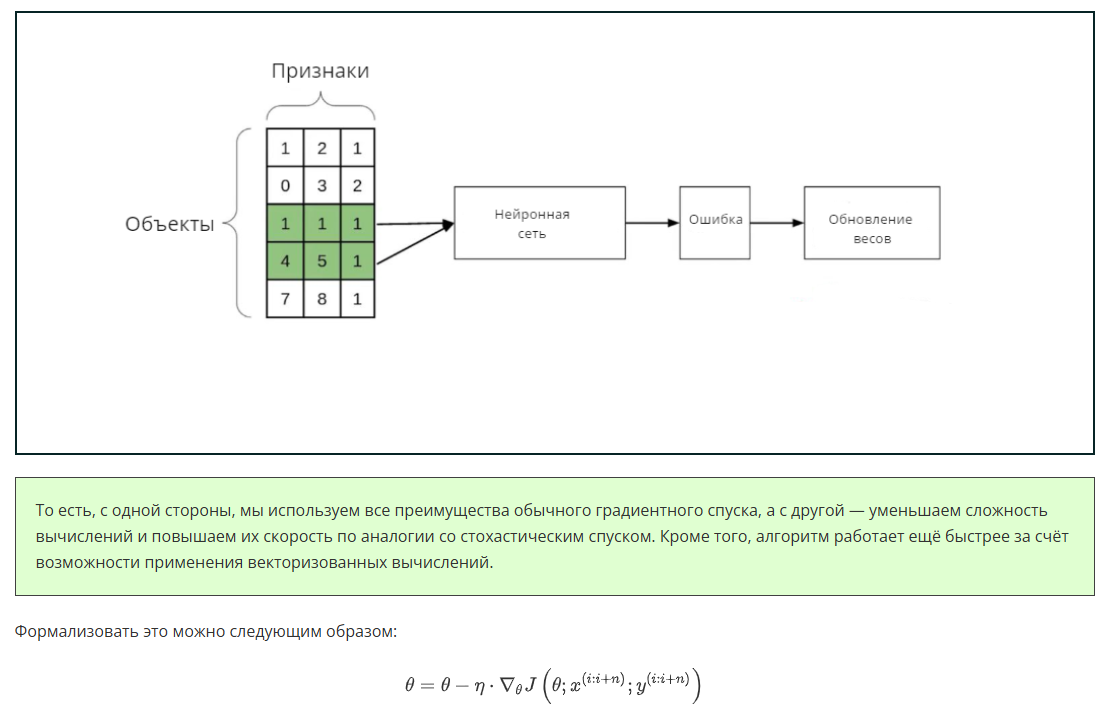

Как показывает визуализация ниже, амплитуда колебаний при сходимости алгоритма больше, чем в классическом градиентном спуске, но меньше, чем в стохастическом:

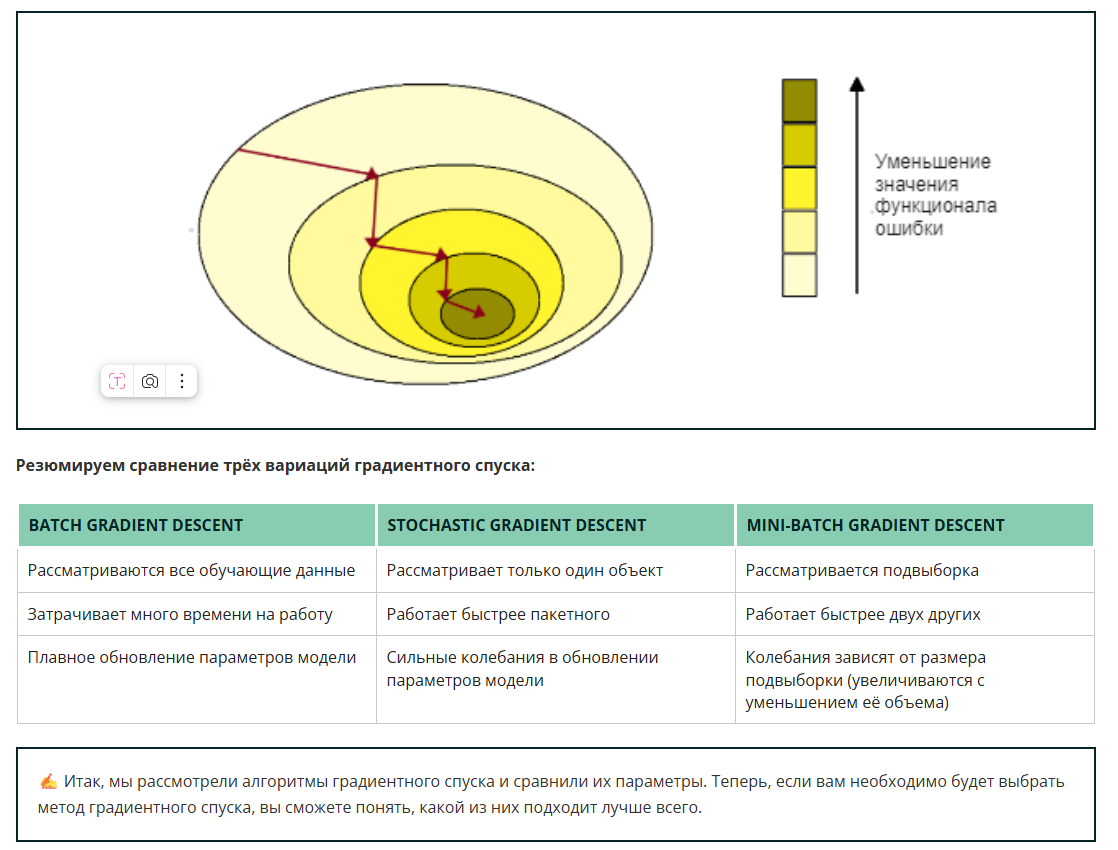

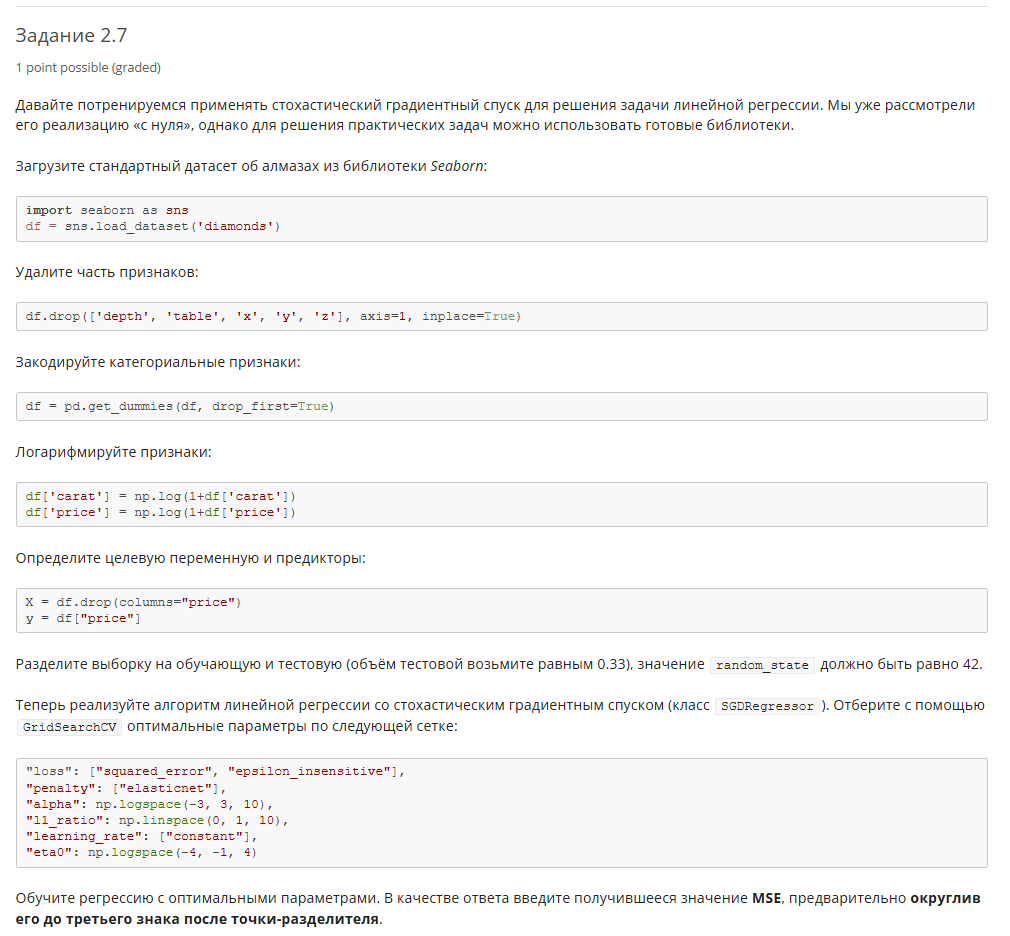

In [1]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import pandas as pd
import numpy as np

df = sns.load_dataset('diamonds')

df.drop(['depth', 'table', 'x', 'y', 'z'], axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)

df['carat'] = np.log(1+df['carat'])
df['price'] = np.log(1+df['price'])

X_cols = [col for col in df.columns if col!='price']
X = df[X_cols]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

parameters = {
    "loss": ["squared_error", "epsilon_insensitive"],
    "penalty": ["elasticnet"],
    "alpha": np.logspace(-3, 3, 10),
    "l1_ratio": np.linspace(0, 1, 10),
    "learning_rate": ["constant"],
    "eta0": np.logspace(-4, -1, 4)
}

sgd = SGDRegressor(random_state=42)
sgd_cv = GridSearchCV(estimator=sgd, param_grid=parameters, n_jobs=-1)
sgd_cv.fit(X_train, y_train)

print(sgd_cv.best_params_)

sgd = SGDRegressor(**sgd_cv.best_params_, random_state = 42)

sgd.fit(X_train, y_train)
sgd.score(X_train, y_train) # r2
ls = sgd.predict(X_test)

round(mean_squared_error(y_test, ls), 3)

{'alpha': np.float64(0.001), 'eta0': np.float64(0.001), 'l1_ratio': np.float64(0.0), 'learning_rate': 'constant', 'loss': 'epsilon_insensitive', 'penalty': 'elasticnet'}


0.044

### *Бонус: алгоритмы, основанные на градиентном спуске

Градиентный спуск настолько популярен и хорошо применим для решения различных задач, что послужил основой множества дополнительных методов. Поговорим про некоторые из них.

Иногда в данных присутствуют очень редко встречающиеся входные параметры.

Например, если мы классифицируем письма на «Спам» и «Не спам», таким параметром может быть очень специфическое слово, которое встречается в спаме намного реже других слов-индикаторов. Или, если мы говорим о распознавании изображений, это может быть какая-то очень редкая характеристика объекта.

В таком случае нам хотелось бы иметь для каждого параметра свою скорость обучения: чтобы для часто встречающихся она была низкой (для более точной настройки), а для совсем редких — высокой (это повысит скорость сходимости). То есть нам очень важно уметь обновлять параметры модели, учитывая то, насколько типичные и значимые признаки они кодируют.

Решение этой задачи предложено в рамках алгоритма **AdaGrad** (его название обозначает, что это адаптированный градиентный спуск). В нём обновления происходят по следующему принципу:

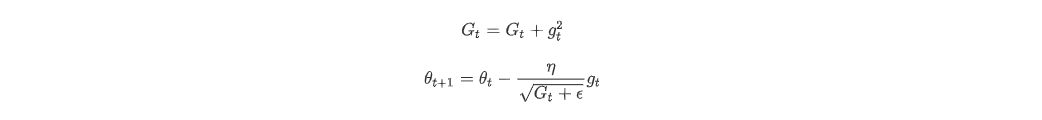

Здесь мы храним сумму квадратов градиентов для каждого параметра. Таким образом, параметры, которые сильно обновляются каждый раз, начинают обновляться слабее. Скорость обучения в таком алгоритме будет постоянно затухать. Мы будем начинать с больших шагов, и с приближением к точке минимума шаги будут уменьшаться — это улучшит скорость сходимости.

Данный алгоритм достаточно популярен и работает лучше стохастического градиентного спуска. Его использует и компания Google в своих алгоритмах классификации изображений.

Однако снижение скорости обучения в AdaGrad иногда происходит слишком радикально, и она практически обнуляется. Чтобы решить эту проблему, были созданы алгоритмы RMSProp, AdaDelta, Adam и некоторые другие.

Если вам интересно подробнее узнать о перечисленных алгоритмах и окунуться в процесс оптимизации нейронных сетей, рекомендуем обратиться к следующим статьям:

- "An overview of gradient descent optimization algorithms" https://arxiv.org/pdf/1609.04747
- «Методы оптимизации нейронных сетей» https://habr.com/ru/articles/318970/

#  3. Метод Ньютона